In [ ]:
#import library yang dibutuhkan
import pandas as pd
import re
import string
import math
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
#import dataset from local computer
from google.colab import files
uploaded = files.upload()

In [ ]:
df=pd.read_excel('DatasetPulp.xlsx')

,Nomor PEB,Tanggal,Barang,Kode Barang,Jumlah Kms Brg,Jenis Kms Brg,Produksi,Jenis Satuan,Jml Container,Pelabuhan Muat,Pelabuhan Bongkar,Negara Penerima
0,1,2022-01-01,NAPKIN TISSUE BASIS WEIGHT 18 GSM +/-0.5NAPKIN...,48183000,136.00,RO,16.885,TNE,1,IDPWG,TWKHH,TW
1,2,2022-01-01,NAPKIN TISSUE,48183000,908.00,RO,155.093,TNE,16,IDPWG,GRSKG,GR
2,3,2022-01-01,JUMBO ROLL TISSUE,48183000,484.00,RO,156.500,TNE,21,IDPWG,KRPUS,KR
3,4,2022-01-01,FACIAL TISSUE,48181000,4.39,BL,160.148,TNE,3,IDPWG,AUBNE,AU
4,5,2022-01-01,MULTI PURPOSE TISSUE,48183000,244.00,RO,160.148,TNE,3,IDPWG,VNCLI,VN
...,...,...,...,...,...,...,...,...,...,...,...,...
3776,3777,2022-12-31,JUMBO KITCHEN TOWEL TISSUE PP ORIGINAL000,48183000,54.00,RO,150.035,TNE,3,IDPWG,USLGB,US
3777,3778,2022-12-31,JUMBO KITCHEN TOWEL TISSUE PP ORIGINAL000,48183000,54.00,RO,150.035,TNE,3,IDPWG,USLGB,US
3778,3779,2022-12-31,JUMBO ROLL TISSUE,48183000,80.00,RO,169.635,TNE,2,IDPWG,KRICH,KR
3779,3780,2022-12-31,JUMBO TOILET TISSUE IN REELS,48183000,126.00,RO,97.740,TNE,7,IDPWG,ZADUR,ZA


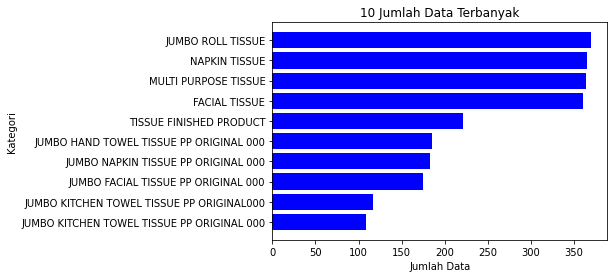

In [ ]:
# membuat dataframe baru untuk menghitung jumlah data yang sama di kolom
count_df = pd.DataFrame({'count': df.groupby(['Barang']).size()}).reset_index()
# mengurutkan dataframe berdasarkan jumlah data terbanyak dan mengambil 10 nilai teratas
top_10_counts = count_df.sort_values('count', ascending=False).head(10)
# membuat plot diagram batang
plt.barh(top_10_counts['Barang'], top_10_counts['count'], color='blue')
plt.xlabel('Jumlah Data')
plt.ylabel('Kategori')
plt.title('10 Jumlah Data Terbanyak')
# membalikkan sumbu x agar diagram batang ke kanan
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df.columns

Index(['Nomor PEB', 'Tanggal', 'Barang', 'Kode Barang', 'Jumlah Kms Brg',
       'Jenis Kms Brg', 'Produksi', 'Jenis Satuan', 'Jml Container',
       'Pelabuhan Muat', 'Pelabuhan Bongkar', 'Negara Penerima'],
      dtype='object')

In [ ]:
#Memilih variabel yang akan diolah
df=df.query('Barang == "NAPKIN TISSUE"')
df

,Nomor PEB,Tanggal,Barang,Kode Barang,Jumlah Kms Brg,Jenis Kms Brg,Produksi,Jenis Satuan,Jml Container,Pelabuhan Muat,Pelabuhan Bongkar,Negara Penerima
1,2,2022-01-01,NAPKIN TISSUE,48183000,908.0,RO,155.093,TNE,16,IDPWG,GRSKG,GR
5,6,2022-01-02,NAPKIN TISSUE,48183000,221.0,RO,155.276,TNE,13,IDPWG,GRPIR,GR
9,10,2022-01-03,NAPKIN TISSUE,48183000,290.0,RO,156.722,TNE,3,IDPWG,INMAA,IN
14,15,2022-01-04,NAPKIN TISSUE,48183000,12.0,RO,154.297,TNE,1,IDPWG,GRSKG,GR
32,33,2022-01-05,NAPKIN TISSUE,48183000,20.0,RO,155.921,TNE,5,IDPWG,GBFXT,GB
...,...,...,...,...,...,...,...,...,...,...,...,...
3697,3698,2022-12-27,NAPKIN TISSUE,48183000,60.0,RO,164.719,TNE,3,IDPWG,NCNOU,AU
3713,3714,2022-12-28,NAPKIN TISSUE,48183000,48.0,RO,164.276,TNE,1,IDPWG,MYWSP,MY
3726,3727,2022-12-29,NAPKIN TISSUE,48183000,240.0,RO,164.482,TNE,6,IDPWG,PECLL,PE
3767,3768,2022-12-30,NAPKIN TISSUE,48183000,160.0,RO,165.221,TNE,4,IDPWG,PECLL,PE


In [ ]:
df = df[['Tanggal','Produksi']]
df.dtypes

Tanggal     datetime64[ns]
Produksi           float64
dtype: object

In [ ]:
df['Tanggal']= pd.to_datetime(df.Tanggal)
df['Produksi'] = df['Produksi'].astype(float)

<ipython-input-33-61c2c543ce37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tanggal']= pd.to_datetime(df.Tanggal)
<ipython-input-33-61c2c543ce37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Produksi'] = df['Produksi'].astype(float)


In [ ]:
df.dtypes

Tanggal     datetime64[ns]
Produksi           float64
dtype: object

In [ ]:
df.index = df.pop('Tanggal')
df

,Produksi
Tanggal,
2022-01-01,155.093
2022-01-02,155.276
2022-01-03,156.722
2022-01-04,154.297
2022-01-05,155.921
...,...
2022-12-27,164.719
2022-12-28,164.276
2022-12-29,164.482


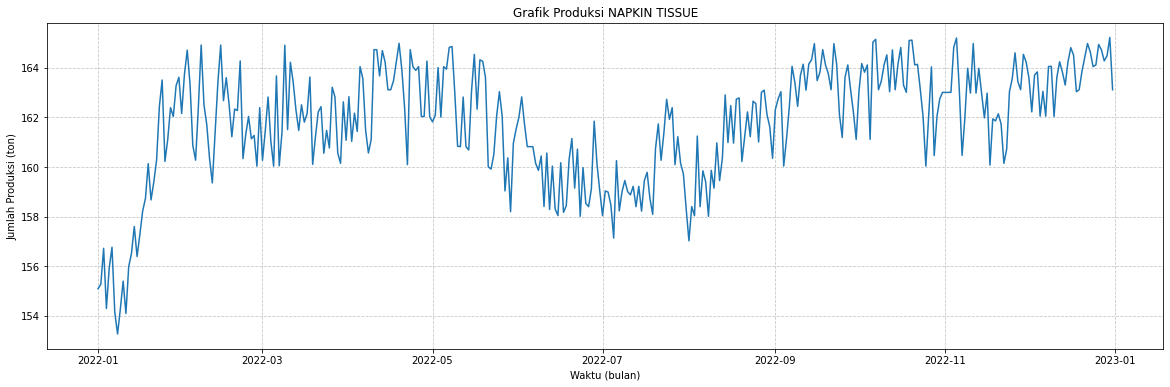

In [ ]:
#menampilkan grafik dataset
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df.index, df['Produksi'])
ax.set_xlabel('Waktu (bulan)')
ax.set_ylabel('Jumlah Produksi (ton)')
ax.set_title('Grafik Produksi NAPKIN TISSUE')
ax.grid(linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df.shape

(365, 1)

In [ ]:
#scalling
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [ ]:
# split data
train_size = int(len(df) * 0.75)
test_size = len(df) - train_size
train = df[0:train_size,:]
test = df[train_size:len(df),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 273, test size: 92 


In [ ]:
# menentukan timestamp
time_stemp = 1
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [ ]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# melatih model LSTM
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
271/271 [==============================] - 3s 3ms/step - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 2/50
271/271 [==============================] - 1s 3ms/step - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 3/50
271/271 [==============================] - 1s 3ms/step - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 4/50
271/271 [==============================] - 1s 2ms/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 5/50
271/271 [==============================] - 1s 3ms/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 6/50
271/271 [==============================] - 1s 3ms/step - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 7/50
271/271 [==============================] - 1s 3ms/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 8/50
271/271 [==============================] - 1s 3ms/step - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 9/50
271/271 [==============================] - 1s 4ms/step - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 10/5

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                480       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score NAPKIN TISSUE : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score NAPKIN TISSUE : %.2f RMSE' % (testScore))

3/3 [==============================] - 0s 4ms/step
Train Score NAPKIN TISSUE : 1.47 RMSE
Test Score NAPKIN TISSUE : 1.29 RMSE


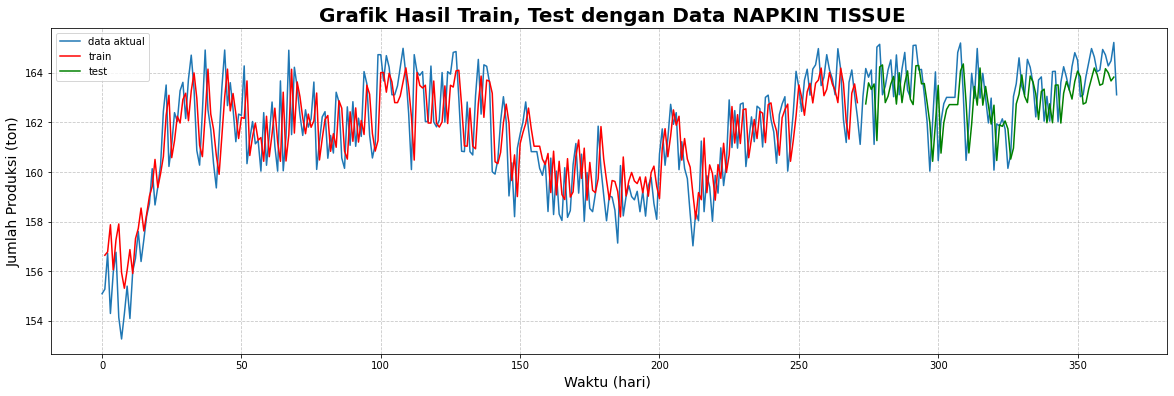

In [ ]:
# shifting train
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(df)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,6))
plt.plot(scaler.inverse_transform(df),label='data aktual')
plt.plot(trainPredictPlot,color='red',label='train')
plt.plot(testPredictPlot,color='green',label='test')
plt.title(' Grafik Hasil Train, Test dengan Data NAPKIN TISSUE', fontsize=20 , fontweight='bold')
plt.xlabel('Waktu (hari) ', fontsize=14)
plt.ylabel('Jumlah Produksi (ton)', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()

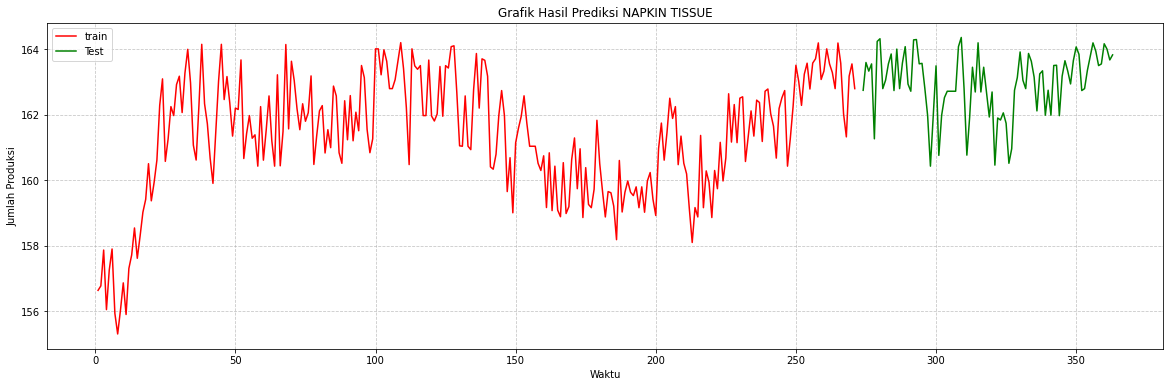

In [ ]:
#menampilkan grafik hasil data train dan test
plt.figure(figsize=(20,6))
plt.plot(trainPredictPlot,color='red',label='train')
plt.plot(testPredictPlot,color='green',label='Test')
plt.title('Grafik Hasil Prediksi NAPKIN TISSUE')
plt.xlabel('Waktu')
plt.ylabel('Jumlah'Jumlah'Jumlah'Jumlah'Jumlah'Jumlah'Jumlah'Jumlah Produksi')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()